In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# Load data
technicals = pd.read_csv(r"dataset\technicals_cleaned\VBL_technicals.csv")
fundamentals = pd.read_csv(r"dataset\fundamentals_cleaned\Varun Beverages.csv")

# Convert date columns
technicals['Date'] = pd.to_datetime(technicals['Date'])
fundamentals['Date'] = pd.to_datetime(fundamentals['Date'])

print("Technical Data Shape:", technicals.shape)
print("\nTechnical Data Info:")
print(technicals.head())
print("\n" + "="*80 + "\n")
print("Fundamentals Data Shape:", fundamentals.shape)
print("\nFundamentals Data Info:")
print(fundamentals.head())

  Company        Date      Close       High        Low       Open   Volume  \
0     VBL  2018-11-21  45.516529  46.190548  45.391604  45.844823   204946   
1     VBL  2018-11-22  44.627522  46.170209  44.508409  45.321877   952003   
2     VBL  2018-11-26  44.752449  45.214384  44.299233  45.214384  1862071   
3     VBL  2018-11-27  44.894802  45.873872  44.450298  44.857035   418905   
4     VBL  2018-11-28  44.470638  45.013923  44.101671  44.772787   283618   

   20_SMA  50_SMA  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  


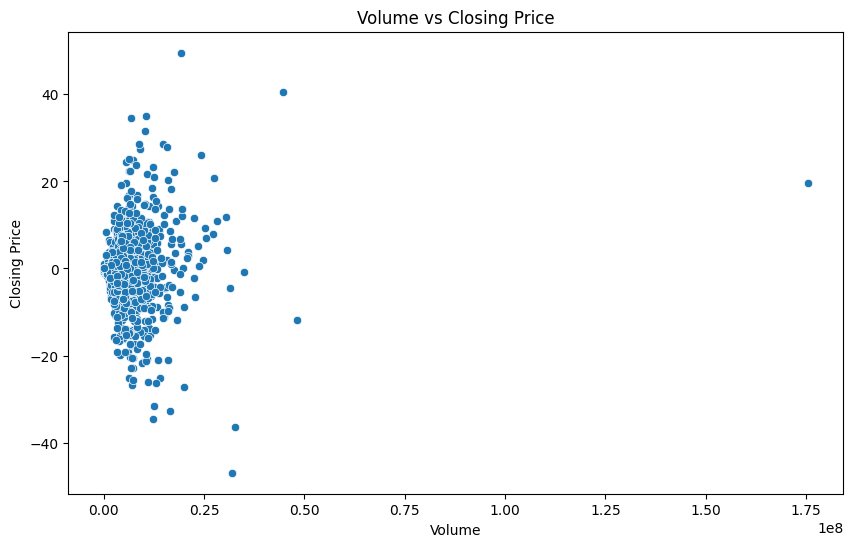

In [ ]:
# ============================================================================
# TECHNICAL ANALYSIS VISUALIZATIONS
# ============================================================================

# 1. Stock Price Movement with Volume
fig = make_subplots(
    rows=2, cols=1, 
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3],
    subplot_titles=("VBL Stock Price Over Time", "Trading Volume")
)

fig.add_trace(
    go.Scatter(x=technicals['Date'], y=technicals['Close'], 
               mode='lines', name='Close Price',
               line=dict(color='#1f77b4', width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=technicals['Date'], y=technicals['Volume'], 
           name='Volume', marker=dict(color='rgba(31, 119, 180, 0.3)')),
    row=2, col=1
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price (₹)", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_layout(height=600, title_text="VBL Technical Analysis: Price & Volume", hovermode='x unified')
fig.show()

In [ ]:
# 2. Candlestick Chart
fig = go.Figure(data=[go.Candlestick(
    x=technicals['Date'],
    open=technicals['Open'],
    high=technicals['High'],
    low=technicals['Low'],
    close=technicals['Close'],
    name='VBL'
)])

fig.update_layout(
    title="VBL Candlestick Chart",
    yaxis_title='Stock Price (₹)',
    xaxis_title='Date',
    template='plotly_white',
    height=600,
    hovermode='x unified'
)
fig.show()

In [ ]:
# 3. Daily Returns Analysis
technicals['Daily_Return'] = technicals['Close'].pct_change() * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Daily Returns Distribution
axes[0, 0].hist(technicals['Daily_Return'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(technicals['Daily_Return'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {technicals["Daily_Return"].mean():.3f}%')
axes[0, 0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Daily Return (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Cumulative Returns
cumulative_returns = (1 + technicals['Daily_Return']/100).cumprod()
axes[0, 1].plot(technicals['Date'], cumulative_returns, color='green', linewidth=2)
axes[0, 1].fill_between(technicals['Date'], cumulative_returns, alpha=0.3, color='green')
axes[0, 1].set_title('Cumulative Returns', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Return')
axes[0, 1].grid(True, alpha=0.3)

# Price Range (High - Low)
technicals['Price_Range'] = technicals['High'] - technicals['Low']
axes[1, 0].plot(technicals['Date'], technicals['Price_Range'], color='purple', linewidth=1.5, alpha=0.7)
axes[1, 0].fill_between(technicals['Date'], technicals['Price_Range'], alpha=0.3, color='purple')
axes[1, 0].set_title('Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price Range (₹)')
axes[1, 0].grid(True, alpha=0.3)

# Volume vs Daily Return
scatter = axes[1, 1].scatter(technicals['Volume']/1e6, technicals['Daily_Return'], c=technicals['Daily_Return'], 
                             cmap='RdYlGn', alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Volume vs Daily Returns', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Volume (Millions)')
axes[1, 1].set_ylabel('Daily Return (%)')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Return %')

plt.tight_layout()
plt.show()

In [ ]:
# 4. Technical Indicators - Moving Averages
fig = go.Figure()

fig.add_trace(go.Scatter(x=technicals['Date'], y=technicals['Close'], 
                        mode='lines', name='Close Price', 
                        line=dict(color='black', width=2)))

fig.add_trace(go.Scatter(x=technicals['Date'], y=technicals['20_SMA'], 
                        mode='lines', name='20-Day SMA',
                        line=dict(color='blue', width=2)))

fig.add_trace(go.Scatter(x=technicals['Date'], y=technicals['50_SMA'], 
                        mode='lines', name='50-Day SMA',
                        line=dict(color='red', width=2)))

fig.update_layout(
    title="VBL Price with Moving Averages (SMA)",
    yaxis_title='Stock Price (₹)',
    xaxis_title='Date',
    template='plotly_white',
    height=500,
    hovermode='x unified'
)
fig.show()

In [ ]:
# 5. Box Plot - Price Distribution by Year
technicals['Year'] = technicals['Date'].dt.year

fig = go.Figure()
for year in sorted(technicals['Year'].unique()):
    year_data = technicals[technicals['Year'] == year]['Close']
    fig.add_trace(go.Box(y=year_data, name=str(year), boxmean='sd'))

fig.update_layout(
    title="VBL Price Distribution by Year",
    yaxis_title='Stock Price (₹)',
    xaxis_title='Year',
    template='plotly_white',
    height=500,
    showlegend=True
)
fig.show()

In [ ]:
# 6. Technical Statistics
print("="*80)
print("TECHNICAL DATA STATISTICS")
print("="*80)
print(f"\nClose Price Statistics:")
print(f"  Min: ₹{technicals['Close'].min():.2f}")
print(f"  Max: ₹{technicals['Close'].max():.2f}")
print(f"  Mean: ₹{technicals['Close'].mean():.2f}")
print(f"  Std Dev: ₹{technicals['Close'].std():.2f}")

print(f"\nVolume Statistics:")
print(f"  Total Volume: {technicals['Volume'].sum()/1e9:.2f} Billion")
print(f"  Avg Daily Volume: {technicals['Volume'].mean()/1e6:.2f} Million")
print(f"  Max Volume: {technicals['Volume'].max()/1e6:.2f} Million")

print(f"\nDaily Returns Statistics:")
print(f"  Mean Return: {technicals['Daily_Return'].mean():.4f}%")
print(f"  Std Dev: {technicals['Daily_Return'].std():.4f}%")
print(f"  Max Gain: {technicals['Daily_Return'].max():.4f}%")
print(f"  Max Loss: {technicals['Daily_Return'].min():.4f}%")

In [ ]:
# ============================================================================
# FUNDAMENTAL ANALYSIS VISUALIZATIONS
# ============================================================================

# Prepare fundamentals data - handle missing values
fundamentals_clean = fundamentals.dropna(subset=['Net profit', 'Sales', 'Profit before tax'])

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Sales Over Time
axes[0, 0].plot(fundamentals_clean['Date'], fundamentals_clean['Sales'], marker='o', linewidth=2.5, markersize=8, color='#FF6B6B')
axes[0, 0].fill_between(fundamentals_clean['Date'], fundamentals_clean['Sales'], alpha=0.3, color='#FF6B6B')
axes[0, 0].set_title('Sales Revenue Trend', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Sales (Cr)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Net Profit Over Time
axes[0, 1].plot(fundamentals_clean['Date'], fundamentals_clean['Net profit'], marker='s', linewidth=2.5, markersize=8, color='#4ECDC4')
axes[0, 1].fill_between(fundamentals_clean['Date'], fundamentals_clean['Net profit'], alpha=0.3, color='#4ECDC4')
axes[0, 1].set_title('Net Profit Trend', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Net Profit (Cr)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Profit Margin Trend
fundamentals_clean['Profit_Margin'] = (fundamentals_clean['Net profit'] / fundamentals_clean['Sales']) * 100
axes[1, 0].plot(fundamentals_clean['Date'], fundamentals_clean['Profit_Margin'], marker='D', linewidth=2.5, markersize=8, color='#95E1D3')
axes[1, 0].fill_between(fundamentals_clean['Date'], fundamentals_clean['Profit_Margin'], alpha=0.3, color='#95E1D3')
axes[1, 0].set_title('Net Profit Margin %', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Margin (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Sales vs Net Profit Comparison
x = np.arange(len(fundamentals_clean))
width = 0.35
axes[1, 1].bar(x - width/2, fundamentals_clean['Sales']/1000, width, label='Sales (in Thousands Cr)', color='#FFB6B9')
axes[1, 1].bar(x + width/2, fundamentals_clean['Net profit']/1000, width, label='Net Profit (in Thousands Cr)', color='#8EC5FC')
axes[1, 1].set_title('Sales vs Net Profit Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Amount (in Thousands Cr)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([d.strftime('%Y') for d in fundamentals_clean['Date']], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# 7. Fundamentals Ratio Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ROE (Return on Equity)
fundamentals_clean['ROE'] = (fundamentals_clean['Net profit'] / fundamentals_clean['Equity Share Capital']) * 100
axes[0, 0].plot(fundamentals_clean['Date'], fundamentals_clean['ROE'], marker='o', linewidth=2.5, markersize=8, color='#F38181')
axes[0, 0].fill_between(fundamentals_clean['Date'], fundamentals_clean['ROE'], alpha=0.3, color='#F38181')
axes[0, 0].set_title('Return on Equity (ROE)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('ROE (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Operating Profit Margin
axes[0, 1].plot(fundamentals_clean['Date'], fundamentals_clean['Operating Profit'], marker='s', linewidth=2.5, markersize=8, color='#AA96DA')
axes[0, 1].fill_between(fundamentals_clean['Date'], fundamentals_clean['Operating Profit'], alpha=0.3, color='#AA96DA')
axes[0, 1].set_title('Operating Profit Trend', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Operating Profit (Cr)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Employee Cost as % of Sales
fundamentals_clean['Employee_Cost_Pct'] = (fundamentals_clean['Employee Cost'] / fundamentals_clean['Sales']) * 100
axes[1, 0].bar(fundamentals_clean['Date'], fundamentals_clean['Employee_Cost_Pct'], color='#FCBAD3', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Employee Cost as % of Sales', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of Sales')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Borrowings Trend
axes[1, 1].plot(fundamentals_clean['Date'], fundamentals_clean['Borrowings'], marker='D', linewidth=2.5, markersize=8, color='#A8DADC')
axes[1, 1].fill_between(fundamentals_clean['Date'], fundamentals_clean['Borrowings'], alpha=0.3, color='#A8DADC')
axes[1, 1].set_title('Borrowings Trend', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Borrowings (Cr)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 8. Interactive Fundamentals Dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sales & Net Profit", "Profit Margin %", "Interest Expense", "Dividend Amount"),
    specs=[[{"secondary_y": True}, {}], [{}, {}]]
)

# Sales & Net Profit
fig.add_trace(
    go.Scatter(x=fundamentals_clean['Date'], y=fundamentals_clean['Sales'], 
               name='Sales', mode='lines+markers', line=dict(color='#FF6B6B', width=2)),
    secondary_y=False, row=1, col=1
)
fig.add_trace(
    go.Scatter(x=fundamentals_clean['Date'], y=fundamentals_clean['Net profit'], 
               name='Net Profit', mode='lines+markers', line=dict(color='#4ECDC4', width=2)),
    secondary_y=False, row=1, col=1
)

# Profit Margin
fig.add_trace(
    go.Scatter(x=fundamentals_clean['Date'], y=fundamentals_clean['Profit_Margin'], 
               name='Profit Margin %', mode='lines+markers', fill='tozeroy',
               line=dict(color='#95E1D3', width=2)),
    row=1, col=2
)

# Interest Expense
fig.add_trace(
    go.Bar(x=fundamentals_clean['Date'], y=fundamentals_clean['Interest'],
           name='Interest Expense', marker=dict(color='#FFB6B9')),
    row=2, col=1
)

# Dividend
fig.add_trace(
    go.Bar(x=fundamentals_clean['Date'], y=fundamentals_clean['Dividend Amount'],
           name='Dividend Amount', marker=dict(color='#8EC5FC')),
    row=2, col=2
)

fig.update_yaxes(title_text="Amount (Cr)", row=1, col=1)
fig.update_yaxes(title_text="Margin %", row=1, col=2)
fig.update_yaxes(title_text="Interest (Cr)", row=2, col=1)
fig.update_yaxes(title_text="Dividend (Cr)", row=2, col=2)

fig.update_layout(height=800, title_text="VBL Fundamentals Dashboard", hovermode='x unified')
fig.show()

In [ ]:
# 9. Fundamental Statistics Summary
print("="*80)
print("FUNDAMENTAL DATA STATISTICS")
print("="*80)

print(f"\nSales:")
print(f"  Min: ₹{fundamentals_clean['Sales'].min():.2f} Cr")
print(f"  Max: ₹{fundamentals_clean['Sales'].max():.2f} Cr")
print(f"  Mean: ₹{fundamentals_clean['Sales'].mean():.2f} Cr")
print(f"  CAGR: {((fundamentals_clean['Sales'].iloc[-1] / fundamentals_clean['Sales'].iloc[0]) ** (1/len(fundamentals_clean)-1) - 1) * 100:.2f}%")

print(f"\nNet Profit:")
print(f"  Min: ₹{fundamentals_clean['Net profit'].min():.2f} Cr")
print(f"  Max: ₹{fundamentals_clean['Net profit'].max():.2f} Cr")
print(f"  Mean: ₹{fundamentals_clean['Net profit'].mean():.2f} Cr")
print(f"  CAGR: {((fundamentals_clean['Net profit'].iloc[-1] / fundamentals_clean['Net profit'].iloc[0]) ** (1/len(fundamentals_clean)-1) - 1) * 100:.2f}%")

print(f"\nProfit Margin:")
print(f"  Min: {fundamentals_clean['Profit_Margin'].min():.2f}%")
print(f"  Max: {fundamentals_clean['Profit_Margin'].max():.2f}%")
print(f"  Mean: {fundamentals_clean['Profit_Margin'].mean():.2f}%")

print(f"\nReturn on Equity (ROE):")
print(f"  Min: {fundamentals_clean['ROE'].min():.2f}%")
print(f"  Max: {fundamentals_clean['ROE'].max():.2f}%")
print(f"  Mean: {fundamentals_clean['ROE'].mean():.2f}%")

print(f"\nBorrowings:")
print(f"  Min: ₹{fundamentals_clean['Borrowings'].min():.2f} Cr")
print(f"  Max: ₹{fundamentals_clean['Borrowings'].max():.2f} Cr")

print(f"\nDividend:")
print(f"  Total Dividends Paid: ₹{fundamentals_clean['Dividend Amount'].sum():.2f} Cr")
print(f"  Average Dividend: ₹{fundamentals_clean['Dividend Amount'].mean():.2f} Cr")